<center><h1>s4019548 - Nguyen Khanh An</h1></center>
<center><h1>Assignment 1</h1></center>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Introduction

In today's world, the ability to accurately predict human life expectancy has proven to be an invaluable asset to many industries. This project's goal is to deliver on that potential by developing a machine learning model that intake attribute's data to forecast human life expectancy.

The final solution of this project will be integrated into the decision-making process of various fields. For example, healthcare will use it to assist in strategic planning and preventive care initiatives, insurers will use it to refine risk assessment and pricing strategies, and government will be able to host effective health campaigns and allocate resources efficiently

This project will go through the process of the machine learning procedure, which involves:
* ___Exploratory Data Analysis:___ Exploring the given data using various techniques to gain further insights.
* ___Data Preparation:___ Prepare the data to be in an appropriate format, then feeding it into multiple models.
* ___Short-list promising models:___ Explore different models and short-list the best ones.
* ___Fine-tune the system:___  Adjust the hyperparameters of the models for better accuracy.

Given the nature of the dataset and the goal of predicting life expectancy, this will be a model built around supervised learning. And since the target variable (life expectancy) is continuous, a regression technique is the most suitable.

## 2. Exploratory Data Analysis


* ___Given data:___ There are two dataset that was given to us, the train dataset and the test dataset. We are going to use the train dataset to develop our model, and after development, we will be using the test dataset to test its accuracy, or rather the total distance between the hypothesis (regression line) and the actual training examples. We are going with the assumption that data splitting procedure has been taken, meaning proper randomization.

In [9]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [10]:
train_data.head(10)

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,Under5LS,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263.0,262,264,62,0.01,71.279624,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,654.37,33736494.0,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271.0,278,264,64,0.01,73.523582,492.0,18.6,86.0,58.0,8.18,62.0,0.1,686.22,327582.0,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268.0,246,290,66,0.01,73.219243,430.0,18.1,89.0,62.0,8.13,64.0,0.1,707.55,31731688.0,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272.0,248,296,69,0.01,78.184215,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,750.35,3696958.0,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275.0,278,272,71,0.01,7.097109,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,71.16,2978599.0,18.2,18.2,0.454,3.082207
5,6,58.9,146,2012,0,279.0,266,292,74,0.01,79.679367,1989.0,16.7,102.0,66.0,9.20,66.0,0.1,619.73,2883167.0,18.4,18.4,0.448,3.033150
6,7,57.5,146,2011,0,281.0,270,292,77,0.01,56.762217,2861.0,16.2,106.0,63.0,9.42,63.0,0.1,499.40,284331.0,18.6,18.7,0.434,2.983287
7,8,57.0,146,2010,0,287.0,276,298,80,0.03,25.873925,1599.0,15.7,110.0,64.0,8.33,64.0,0.1,418.16,2729431.0,18.8,18.9,0.433,2.949576
8,9,63.0,146,2009,0,295.0,276,314,82,0.02,10.910156,1141.0,NaN,113.0,63.0,6.73,63.0,0.1,414.22,26616792.0,19.0,19.1,0.415,2.898275
9,10,54.1,146,2008,0,295.0,304,286,84,0.03,17.171518,1990.0,14.7,116.0,58.0,7.43,58.0,0.1,305.27,2589345.0,19.2,19.3,0.405,2.846050


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2071 non-null   int64  
 1   TARGET_LifeExpectancy         2071 non-null   float64
 2   Country                       2071 non-null   int64  
 3   Year                          2071 non-null   int64  
 4   Status                        2071 non-null   int64  
 5   AdultMortality                2070 non-null   float64
 6   AdultMortality-Male           2071 non-null   int64  
 7   AdultMortality-Female         2071 non-null   int64  
 8   SLS                           2071 non-null   int64  
 9   Alcohol                       2067 non-null   float64
 10  PercentageExpenditure         2062 non-null   float64
 11  Measles                       2070 non-null   float64
 12  BMI                           2063 non-null   float64
 13  Und

In [12]:
train_data.describe()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,Under5LS,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2070.00000,2071.000000,2071.000000,2071.000000,2067.000000,2062.000000,2070.000000,2063.000000,2070.000000,2070.000000,2061.000000,2071.000000,2068.000000,2062.000000,2.063000e+03,2070.000000,2070.000000,2066.000000,2064.000000
mean,1036.000000,69.274505,95.360212,2009.518590,0.185418,162.82029,161.908257,163.759536,33.079672,4.693009,764.429066,2096.541063,37.572952,45.849275,82.720773,5.881827,82.753259,1.632544,7304.336600,1.205231e+07,4.939034,4.977971,0.609866,3.372332
std,597.990524,9.482281,54.861641,4.614147,0.388730,118.89928,119.442235,118.800292,135.832868,4.205270,2083.501026,9961.872486,19.946367,185.292194,23.192604,2.557347,23.130969,4.784991,15179.036764,6.403752e+07,4.697848,4.786593,0.216610,0.590975
min,1.000000,37.300000,0.000000,2002.000000,0.000000,1.00000,0.000000,2.000000,0.000000,0.010000,0.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,518.500000,63.000000,50.000000,2006.000000,0.000000,74.00000,74.000000,74.000000,0.000000,0.615000,5.688828,0.000000,18.800000,0.000000,77.000000,4.180000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,1036.000000,71.200000,94.000000,2010.000000,0.000000,144.00000,142.000000,144.000000,3.000000,3.820000,68.943329,19.000000,42.100000,4.000000,93.000000,5.640000,93.000000,0.100000,1390.315000,6.477440e+05,3.200000,3.300000,0.655500,3.449638
75%,1553.500000,76.000000,144.000000,2014.000000,0.000000,228.00000,228.000000,230.000000,22.000000,7.840000,429.434148,425.750000,55.900000,27.000000,97.000000,7.430000,97.000000,0.800000,5746.287500,5.364814e+06,7.375000,7.400000,0.770000,3.741657
max,2071.000000,92.700000,192.000000,2017.000000,1.000000,699.00000,704.000000,722.000000,1800.000000,17.870000,19479.911610,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'TARGET_LifeExpectancy'}>,
        <Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Status'}>],
       [<Axes: title={'center': 'AdultMortality'}>,
        <Axes: title={'center': 'AdultMortality-Male'}>,
        <Axes: title={'center': 'AdultMortality-Female'}>,
        <Axes: title={'center': 'SLS'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'PercentageExpenditure'}>,
        <Axes: title={'center': 'Measles'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Under5LS'}>,
        <Axes: title={'center': 'Polio'}>],
       [<Axes: title={'center': 'TotalExpenditure'}>,
        <Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'HIV-AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'Thinness

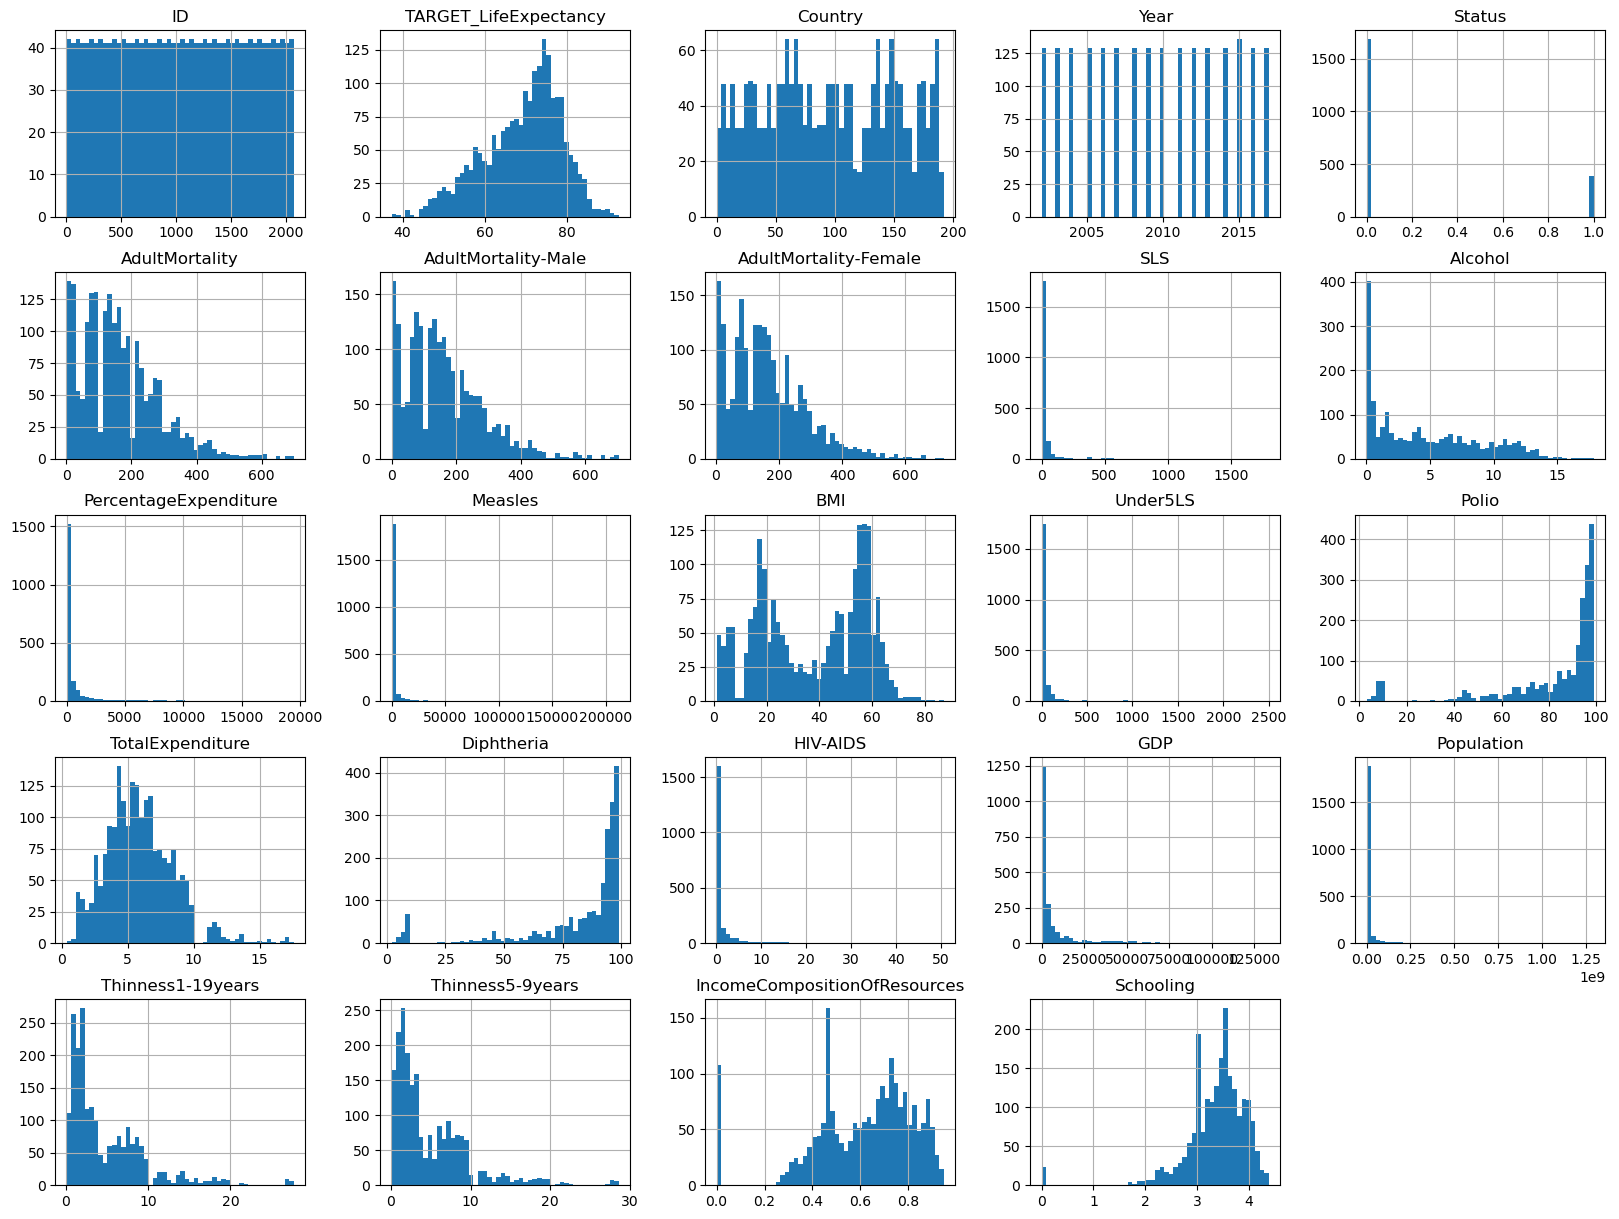

In [13]:
train_data.hist(bins=50, figsize=(20,15))

* ___Data overview:___ As for initial impression goes, there are a total of 24 columns of data. One of which is unusable for the development of the model, the "ID" column, since its only purpose is to index the rows of data. Since  the "TARGET_LifeExpectancy" column is clearly labeled as "TARGET", and based on the purpose of this project, this effectively mean that this is the target attributes for the model. All the attributes featured in the dataset has numerical values.
    * ___Attribute type:___ Although all the attributes are represented as numerical values, it does not mean that they all represent continuous numerical quantities; some attributes may use numbers for other purposes, such as indexing, categorical labeling, or representing boolean values. In the case of our dataset, there are two categorical attributes, "Country" and "Status", with the former being the index of the country and the latter is basically a boolean value representing whether a country has developed. Not accounting for this when in the data preparation process will significantly hinder the accuracy of the model.
    * ___Missing Values:___ There are a total of 15 attributes with missing entries in the test dataset. All of them are numerical type attributes, meaning that it will be relatively straightforward to fill in the blank.
    * ___Noisiness:___